In [13]:
import pandas as pd
import matplotlib.pyplot as plt

card_flow = pd.read_excel('card_flow.xlsx',sheet_name = 'month')
card_flow_day = pd.read_excel('card_flow.xlsx',sheet_name = 'day')

In [3]:
card_flow_day

,STD_YMD,TOTAL_CARD,TOTAL_FLOW
0,20190201,38246556.0,6125184.83
1,20190202,42246932.0,5162973.68
2,20190203,31092889.0,4021130.85
3,20190204,25671360.0,3734017.33
4,20190205,14152211.0,4838444.69
...,...,...,...
236,20200527,32575304.0,4928416.33
237,20200528,31525136.0,4889662.51
238,20200529,33831742.0,5063609.20
239,20200530,37137923.0,4509352.77


In [4]:
import statsmodels.api as sm

x = pd.DataFrame(card_flow['TOTAL_CARD'])
y = pd.DataFrame(card_flow['TOTAL_FLOW'])

lm = sm.OLS(y, x)
lm_trained = lm.fit()
display(lm_trained.summary())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             TOTAL_FLOW   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.831
Method:                 Least Squares   F-statistic:                              40.41
Date:                Mon, 21 Sep 2020   Prob (F-statistic):                    0.000383
Time:                        15:51:14   Log-Likelihood:                         -154.16
No. Observations:                   8   AIC:                                      310.3
Df Residuals:                       7   BIC:                                      310.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TOTAL_CARD     0.1592      0.025      6.357      0.000       0.100       0.218
==============================================================================
Omnibus:                       20.968   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.877
Skew:                           2.151   Prob(JB):                       0.0118
Kurtosis:                       5.850   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
import statsmodels.api as sm

x = pd.DataFrame(card_flow_day['TOTAL_CARD'])
y = pd.DataFrame(card_flow_day['TOTAL_FLOW'])

lm = sm.OLS(y, x)
lm_trained = lm.fit()
display(lm_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             TOTAL_FLOW   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          1.103e+04
Date:                Mon, 21 Sep 2020   Prob (F-statistic):                   1.25e-202
Time:                        15:51:14   Log-Likelihood:                         -3591.5
No. Observations:                 241   AIC:                                      7185.
Df Residuals:                     240   BIC:                                      7189.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TOTAL_CARD     0.1548      0.001    105.039      0.000       0.152       0.158
==============================================================================
Omnibus:                        6.321   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.234
Skew:                          -0.393   Prob(JB):                       0.0443
Kurtosis:                       3.063   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
#선형회귀
import numpy as np
rng = np.random
learning_rate = 0.01
training_epochs = 1000
display_step = 50
train_x = np.asarray(card_flow_day['TOTAL_CARD'])
train_y = np.asarray(card_flow_day['TOTAL_FLOW'])
n_samples = train_x.shape[0]

In [7]:
import tensorflow as tf

X = tf.placeholder('float')
Y = tf.placeholder('float')
W = tf.Variable(rng.randn(), name='weight')
b = tf.Variable(rng.randn(), name='bias')

In [8]:
pred = tf.add(tf.multiply(X,W),b)
cost = tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x,y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x,Y:y})
            if(epoch+1)%display_step ==0:
                c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
                print('Epoch = %04d'%(epoch+1), ', cost = {:.9f}'.format(c), ', W = ', sess.run(W), ', b = ', sess.run(b))
    print('최적화 종료')
    training_cost = sess.run(cost, feed_dict={X:train_x, Y:train_y})
    print('T cost = ', training_cost, ', W = ', sess.run(W))
    plt.plot(train_x, train_y, 'ro', label='Original data')
    plt.plot(train_x, sess.run(W)*train_x + sess.run(b), label='Fitted Line')
    plt.legend()
    plt.show()

Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b

Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b =  nan
Epoch = 0050 , cost = nan , W =  nan , b

Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b =  nan
Epoch = 0100 , cost = nan , W =  nan , b

Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b =  nan
Epoch = 0150 , cost = nan , W =  nan , b

Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b

Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0200 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b

Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan
Epoch = 0250 , cost = nan , W =  nan , b =  nan


KeyboardInterrupt: 

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print(model.coef_)
print(model.intercept_)

[[0.09898698]]
[1803560.09245502]


In [11]:
yfit = model.predict(x)

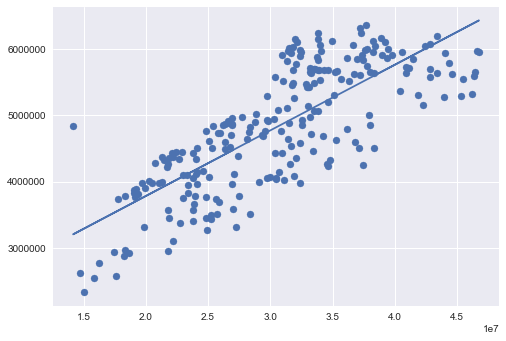

In [14]:
plt.style.use('seaborn')
plt.scatter(x,y) #원래데이터
plt.plot(x, yfit) #예측데이터 plot=직선
#plt.xlabel('flow')
#plt.ylabel('card')

In [15]:
import matplotlib.pyplot as plt
print(plt.style.available) #가진놈들

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']
